In [42]:
import nltk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [43]:
path = '../Data_articles'
data_dirs = [x for x in os.listdir(path) if not x.startswith(".")]


In [44]:
articles = [json.load(open(os.path.join(path,data,d))) for data in data_dirs for d in os.listdir(os.path.join(path,data)) if d.endswith('.json')]


In [ ]:
"""
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

resources = ['punkt', 'stopwords', 'vader_lexicon', 'wordnet', 'averaged_perceptron_tagger','punkt_tab']

print("Descargando recursos de NLTK...")
for resource in resources:
    try:
        result = nltk.download(resource, quiet=True)
        if result:
            print(f"{resource} - OK")
        else:
            print(f"{resource} - Ya existe")
    except Exception as e:
        print(f"❌ {resource} - Error: {e}")

print("Configuración de NLTK completada")"""


In [ ]:
nltk.download("cess_esp")
nltk.download('conll2002')
nltk.download('treebank')
nltk.download('universal_tagset')

In [45]:

stop_words_es = stopwords.words('spanish')
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

In [46]:

print(f"Total de artículos: {len(articles)}")


Total de artículos: 18254


In [47]:
def clean_text(text):
    """
    Limpia y preprocessa el texto
    """
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    
    #text = re.sub(r'[^\w\s]', ' ', text)
    #text = re.sub(r'\d+', '', text)
    
    text = ' '.join(text.split())
    
    return text

def extract_text_from_articles(articles):
    """
    Extrae el texto de los artículos dependiendo de su estructura
    """
    texts = []
    for article in articles:
        if isinstance(article, dict):
            text_content = ""
            if 'text' in article:
                text_content = article['text']
            
            if text_content:
                texts.append(clean_text(text_content))
        elif isinstance(article, str):
            texts.append(clean_text(article))
    
    return [text for text in texts] 

clean_texts = extract_text_from_articles(articles)
print(f"Textos procesados: {len(clean_texts)}")


Textos procesados: 18250


In [48]:

def basic_text_stats(texts):
    """
    Calcula estadísticas básicas de una colección de textos
    """
    all_text = ' '.join(texts)
    
    words = word_tokenize(all_text, language='spanish')
    sentences = sent_tokenize(all_text, language='spanish')
    
    words_no_stop = [word for word in words if word.lower() not in stop_words_es]
    
    stats = {
        'total_textos': len(texts),
        'total_caracteres': len(all_text),
        'total_palabras': len(words),
        'palabras_unicas': len(set(words)),
        'total_oraciones': len(sentences),
        'palabras_sin_stopwords': len(words_no_stop),
        'palabras_unicas_sin_stopwords': len(set(words_no_stop)),
        'promedio_palabras_por_texto': len(words) / len(texts) if texts else 0,
        'promedio_oraciones_por_texto': len(sentences) / len(texts) if texts else 0
    }
    
    return stats, words_no_stop

if clean_texts:
    stats, words_filtered = basic_text_stats(clean_texts)
    
    for key, value in stats.items():
        if isinstance(value, float):
            print(f"{key.replace('_', ' ').title()}: {value:.2f}")
        else:
            print(f"{key.replace('_', ' ').title()}: {value:,}")
else:
    print("No hay textos para analizar")

Total Textos: 18,250
Total Caracteres: 43,598,968
Total Palabras: 7,782,878
Palabras Unicas: 115,478
Total Oraciones: 224,595
Palabras Sin Stopwords: 4,638,279
Palabras Unicas Sin Stopwords: 115,218
Promedio Palabras Por Texto: 426.46
Promedio Oraciones Por Texto: 12.31


TOP 20 PALABRAS MÁS FRECUENTES:
, : 446128 veces
. : 223295 veces
“ : 65726 veces
” : 60789 veces
) : 27728 veces
( : 27709 veces
presidente : 15837 veces
país : 15347 veces
gobierno : 14811 veces
: : 12223 veces
venezuela : 12010 veces
nacional : 12001 veces
parte : 11920 veces
unidos : 9659 veces
personas : 9189 veces
gaza : 9015 veces
pueblo : 9011 veces
según : 8806 veces
acuerdo : 8224 veces
israel : 8178 veces


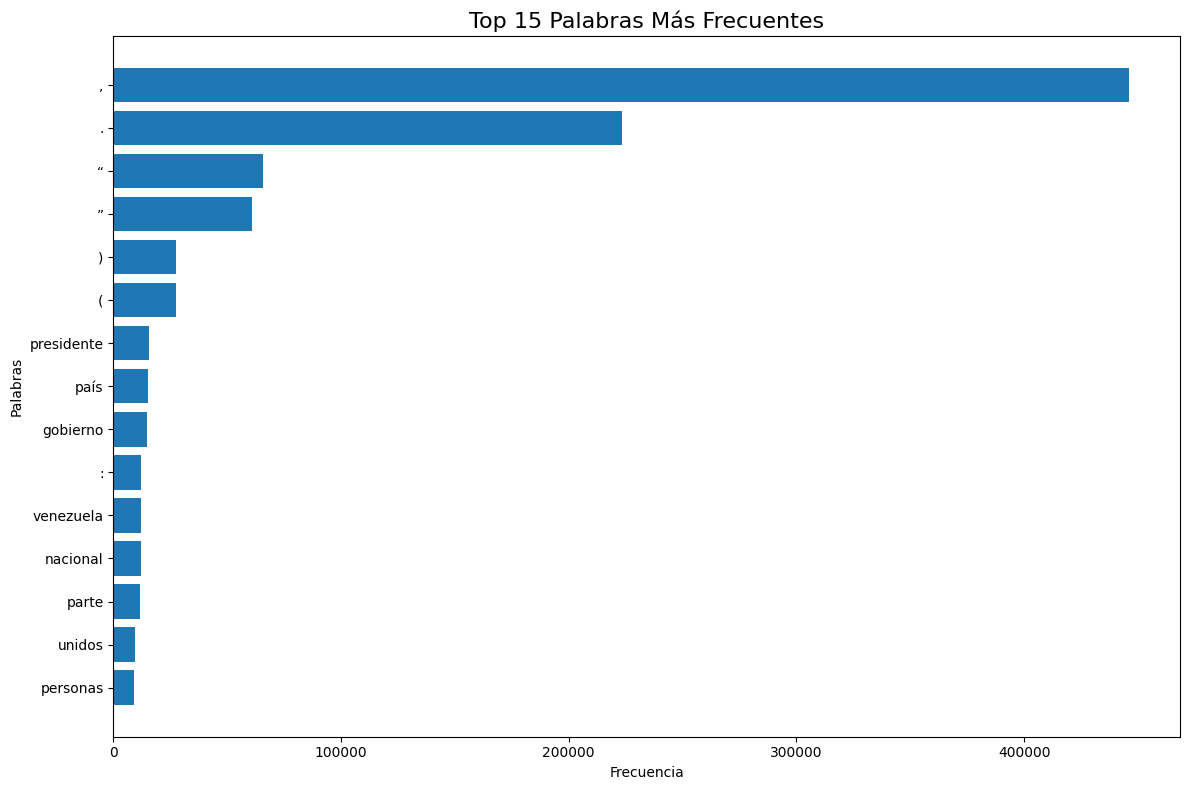


Vocabulario: 115218 palabras únicas


In [49]:

if clean_texts and 'words_filtered' in locals():
    word_freq = Counter(words_filtered)
    
    print("TOP 20 PALABRAS MÁS FRECUENTES:")
    for word, freq in word_freq.most_common(20):
        print(f"{word} : {freq} veces")
    
    top_words = dict(word_freq.most_common(15))
    
    plt.figure(figsize=(12, 8))
    plt.barh(list(top_words.keys())[::-1], list(top_words.values())[::-1])
    plt.title('Top 15 Palabras Más Frecuentes', fontsize=16)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.tight_layout()
    plt.show()
    
    print(f"\nVocabulario: {len(word_freq)} palabras únicas")

ANÁLISIS DE N-GRAMAS:

TOP 10 BIGRAMAS:
------------------------------
” ,                       : 24936 veces
” .                       : 22002 veces
. “                       : 18295 veces
) ,                       : 9531 veces
. asimismo                : 5030 veces
asimismo ,                : 5005 veces
. ,                       : 4845 veces
: “                       : 4267 veces
. además                  : 4100 veces
, mientras                : 4066 veces

TOP 10 TRIGRAMAS:
------------------------------
. asimismo ,                        : 4702 veces
. parte ,                           : 3427 veces
. además ,                          : 3337 veces
” . “                               : 2714 veces
. embargo ,                         : 2037 veces
” , afirmó                          : 1642 veces
” , dijo                            : 1491 veces
, nicolás maduro                    : 1209 veces
presidente nicolás maduro           : 1151 veces
nicolás maduro ,                    : 1108 ve

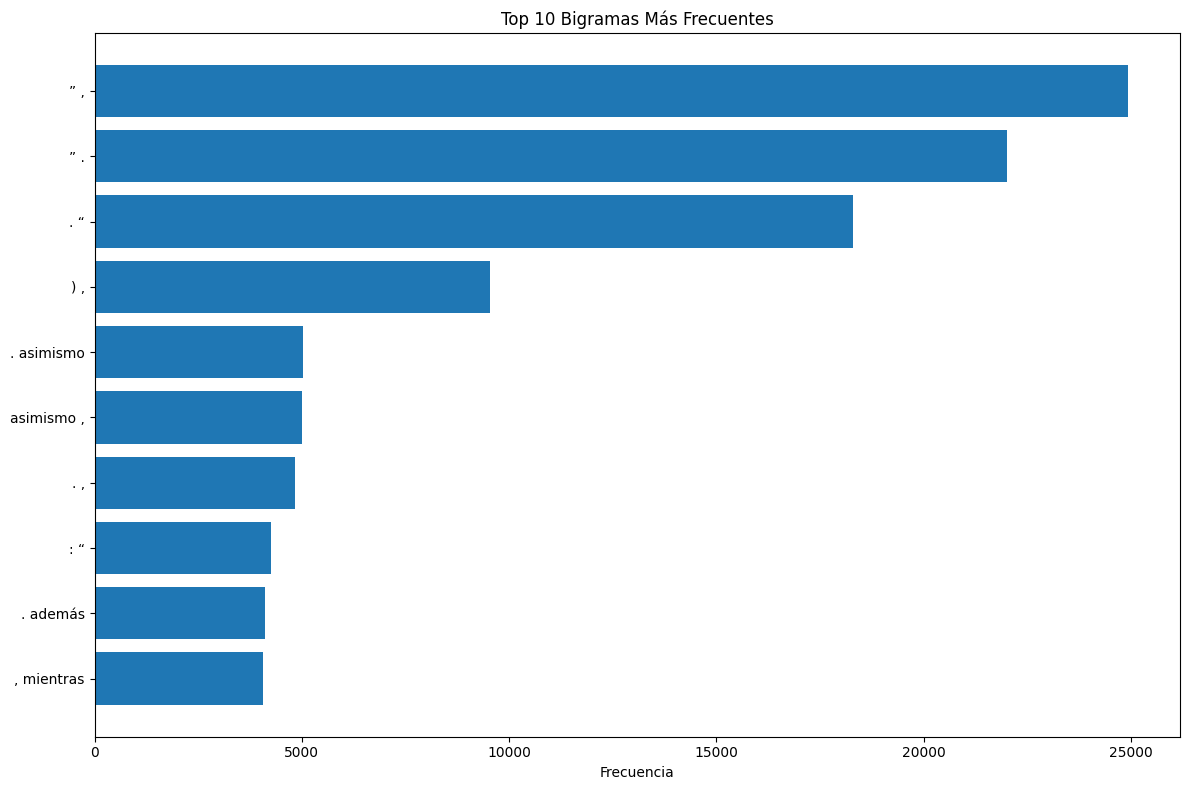

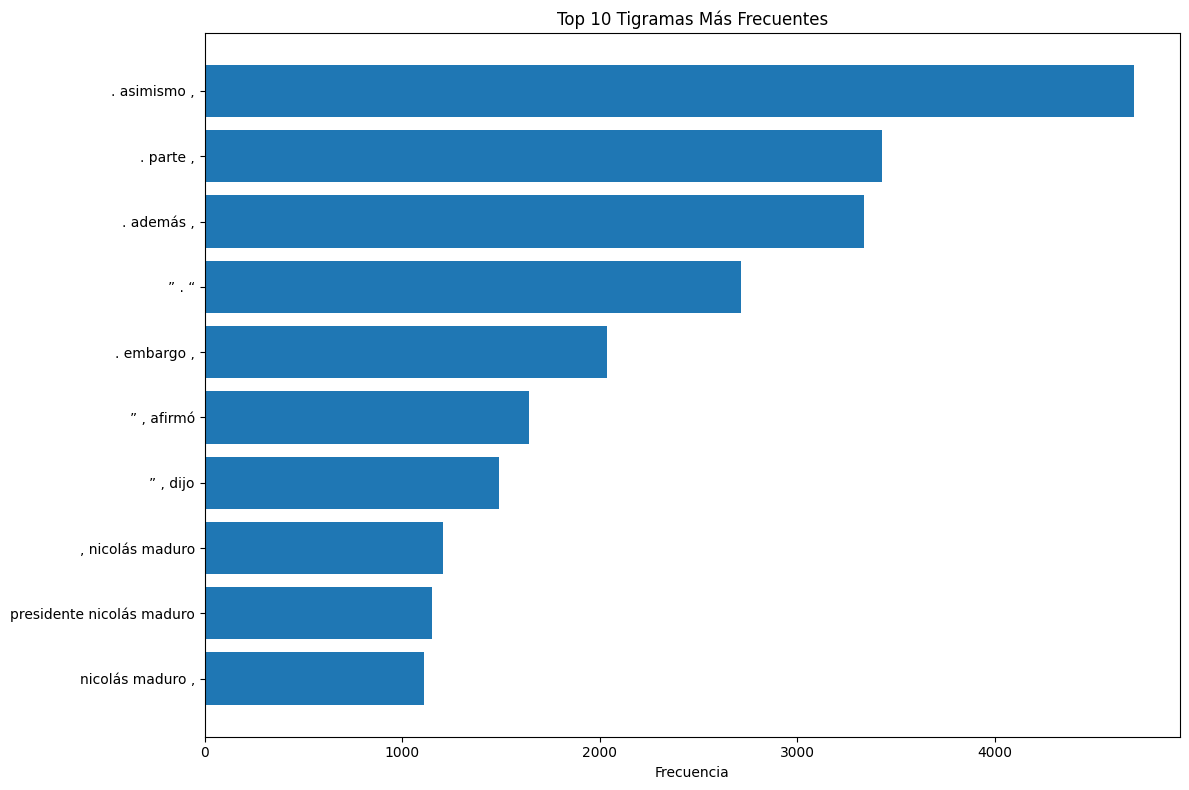

In [50]:

def analyze_ngrams(words, n=2, top_n=10):
    """
    Analiza n-gramas en una lista de palabras
    """
    n_grams = list(ngrams(words, n))
    n_gram_freq = Counter(n_grams)
    return n_gram_freq.most_common(top_n)

if clean_texts and 'words_filtered' in locals():
    print("ANÁLISIS DE N-GRAMAS:")
    print("="*50)
    
    bigrams = analyze_ngrams(words_filtered, n=2, top_n=10)
    print("\nTOP 10 BIGRAMAS:")
    print("-" * 30)
    for bigram, freq in bigrams:
        print(f"{' '.join(bigram):<25} : {freq:>3} veces")
    
    trigrams = analyze_ngrams(words_filtered, n=3, top_n=10)
    print("\nTOP 10 TRIGRAMAS:")
    print("-" * 30)
    for trigram, freq in trigrams:
        print(f"{' '.join(trigram):<35} : {freq:>3} veces")
    
    if bigrams:
        bigram_labels = [' '.join(bg[0]) for bg in bigrams[:10]]
        bigram_counts = [bg[1] for bg in bigrams[:10]]
        
        plt.figure(figsize=(12, 8))
        plt.barh(bigram_labels[::-1], bigram_counts[::-1])
        plt.title('Top 10 Bigramas Más Frecuentes')
        plt.xlabel('Frecuencia')
        plt.tight_layout()
        plt.show()
    if trigrams:
        trigrams_labels = [' '.join(bg[0]) for bg in trigrams[:10]]
        trigrams_counts = [bg[1] for bg in trigrams[:10]]
        
        plt.figure(figsize=(12, 8))
        plt.barh(trigrams_labels[::-1], trigrams_counts[::-1])
        plt.title('Top 10 Tigramas Más Frecuentes')
        plt.xlabel('Frecuencia')
        plt.tight_layout()
        plt.show()


DISTRIBUCIÓN POR SECCIONES:
América Latina y El Caribe: 9394 artículos,  374.2 palabras promedio
Mundo                    : 8039 artículos,  341.4 palabras promedio
En profundidad           :  265 artículos, 1547.5 palabras promedio
Deporte                  :  204 artículos,  307.2 palabras promedio
Cultura                  :  149 artículos,  351.2 palabras promedio
                         :   81 artículos, 1050.2 palabras promedio
Tecnología               :   61 artículos,  294.7 palabras promedio
Sin categoría            :   50 artículos,  235.7 palabras promedio
Lo mejor                 :    4 artículos,   56.5 palabras promedio
Video                    :    3 artículos,  112.3 palabras promedio


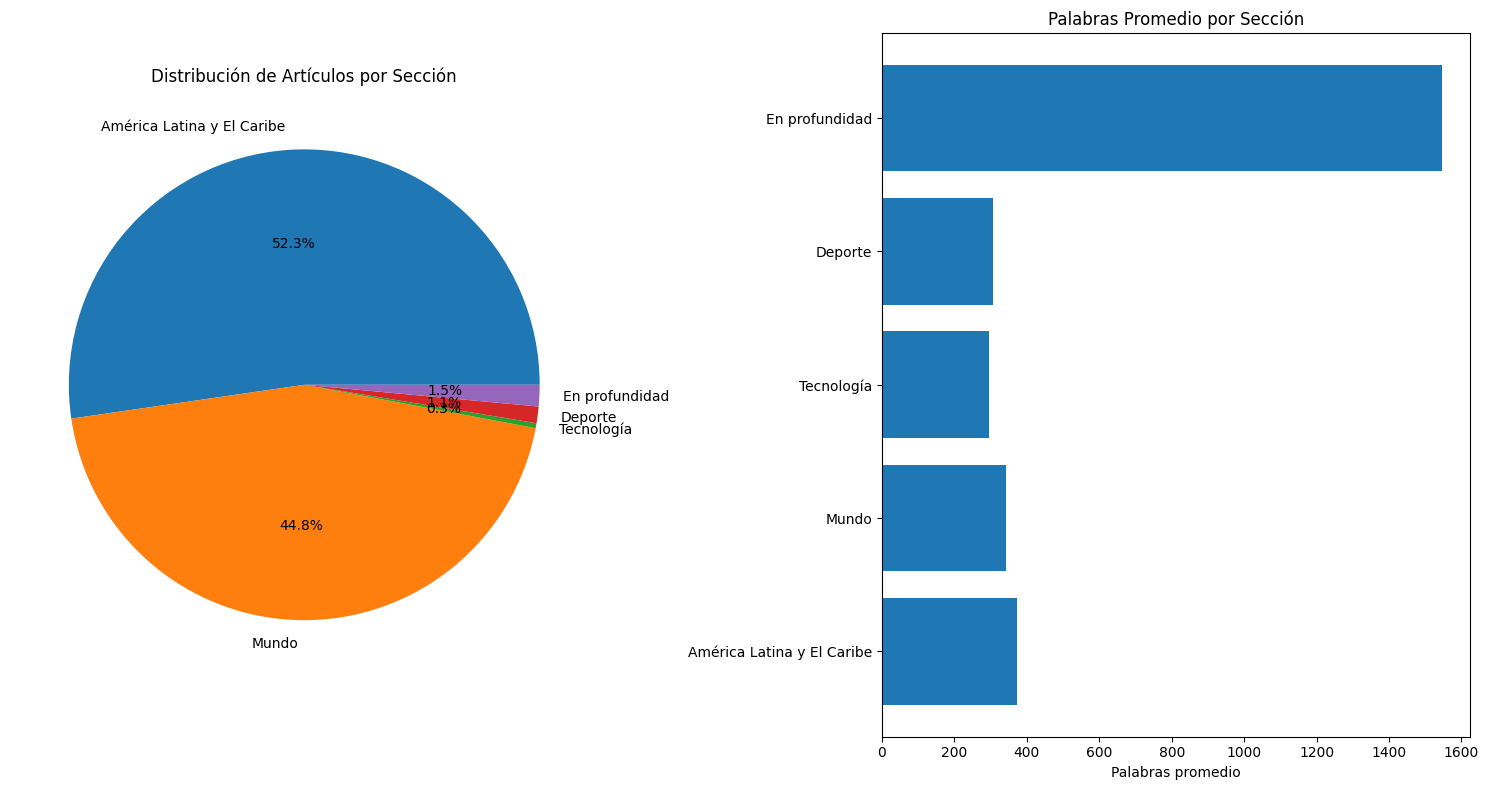

In [51]:

def analyze_by_section():
    """
    Analiza el contenido por secciones
    """
    section_analysis = {}
    
    for article in articles:
        if isinstance(article, dict):
            section = article.get('section', 'Sin categoría')
            text = article.get('text', '')
            
            if section not in section_analysis:
                section_analysis[section] = {
                    'count': 0,
                    'total_words': 0,
                    'texts': []
                }
            
            section_analysis[section]['count'] += 1
            section_analysis[section]['total_words'] += len(text.split())
            section_analysis[section]['texts'].append(text)
    
    return section_analysis


section_stats = analyze_by_section()

print("\nDISTRIBUCIÓN POR SECCIONES:")
for section, data in sorted(section_stats.items(), key=lambda x: x[1]['count'], reverse=True):
    avg_words = data['total_words'] / data['count'] if data['count'] > 0 else 0
    print(f"{section:<25}: {data['count']:>4} artículos, {avg_words:>6.1f} palabras promedio")

if section_stats:
    sections = list(section_stats.keys())[:5] 
    counts = [section_stats[s]['count'] for s in sections]
    
    plt.figure(figsize=(15, 8))
    
    plt.subplot(1, 2, 1)
    plt.pie(counts, labels=sections, autopct='%1.1f%%')
    plt.title('Distribución de Artículos por Sección')
    
    plt.subplot(1, 2, 2)
    avg_words_by_section = [section_stats[s]['total_words']/section_stats[s]['count'] 
                           for s in sections]
    plt.barh(sections, avg_words_by_section)
    plt.title('Palabras Promedio por Sección')
    plt.xlabel('Palabras promedio')
    
    plt.tight_layout()
    plt.show()

# REGEX

In [52]:

regex_eventos = {
    "PROTESTAS_CONFLICTOS_SOCIALES": [
        # Conflictos laborales + Protestas movilizaciones
        r'\b(huelga|paro|conflicto|protesta|manifestación|marcha|movilización|bloquearon|disturbios)\b.*?\b(laboral|sindical|trabajadores|gobierno|presidente|ley|reforma|recorte|construcción)\b',
        r'\b(negociación|convenio|acuerdo)\b.*?\b(colectivo|salarial|laboral)\b',
        r'\b(estudiantes|organizaciones|sociales|indígenas|comunidades|sindicatos|gremios|trabajadores)\b.*?\b(protestan|marchan|movilizan|bloquean|convocan|llaman|anuncian)\b',
        r'\b(medida|acción)\b.*?\b(de fuerza|de protesta)\b',
        r'\b(consignas? de lucha|reclamo|exigencia)\b.*?\b(presupuesto|derechos|justicia)\b',
        r'\b(cortes? de ruta|bloqueos? camineros|tomas? de instalaciones)\b.*?\b(protesta|reclamo|exigencia)\b',
        r'\b(huelgas?|paros?|paralizaciones?)\b.*?\b(actividades?|servicios?|transporte|sector)\b',
        r'\b(cacerolazos?|ruidos?|escraches?|piquetes?|sentadas?|cortes? de calles?|pueblada|tractorazo)\b.*?\b(protesta|rechazo|repudio)\b',
        r'\b(concentraciones?|plantones?|vigilias?)\b.*?\b(pacíficas?|masivas?|multitudinarias?)\b',
        r'\b(jubilados|pensionados|adultos mayores|agricultores|campesinos|trabajadores rurales|transportistas|choferes|conductores)\b.*?\b(movilizan|protestan|marchan|reclaman)\b',
        r'\b(protestas|manifestaciones|disturbios|revueltas)\b.*?\b(dej[óa]|caus[óa]|result[óa])\b.*?\b(\d+)\b.*?\b(muertos|heridos|detenidos)\b',
        r'\b(muertos|heridos|fallecidos)\b.*?\b(en|durante)\b.*?\b(protestas|disturbios|enfrentamientos)\b',
        r'\b(enfrentamientos?|choques?)\b.*?\b(manifestantes|policía|fuerzas)\b',
        r'\b(represión|dispersión|desalojo)\b.*?\b(violenta|forzada|policial)\b',
        r'\b(detenidos?|aprehendidos?|arrestados?)\b.*?\b(protestas?|manifestaciones?)\b',
        r'\b(heridos?|lesionados?|golpeados?)\b.*?\b(enfrentamiento|represión)\b',
        r'\b(manifestaciones?|protestas?|marchas?)\b.*?\b(a favor de|en apoyo a|en solidaridad con)\b.*?\b(pueblo|población|gente)\b',
        r'\b(manifestaciones?|protestas?)\b.*?\b(palestina|palestino|libano|líbanes|gaza)\b',
        r'\b(protestó|manifestó|marchó|movilizó)\b',
        r'\b(bloqueó|cortó|interrumpió|obstruyó)\b',
        r'\b(ocupó|tomó|ingresó)\b.*?\b(edificio|instalación)\b',
        r'\b(convocó|llamó|citó|invitó)\b.*?\b(movilización|protesta)\b'
    ],

    "CONFLICTOS_ARMADOS_OPERACIONES": [
        # Conflictos bélicos + Operaciones militares/policiales
        r'\b(misil|ataque|bombardeo|ofensiva|captura|detención|operación|aprehensión)\b.*?\b(lanzó|impactó|derribó|interceptó|alias|líder|disidencia|grupo armado)\b',
        r'\b(ejército|fuerzas|guardia|policía)\b.*?\b(liberó|rescató|detuvo|capturó|desactivó|controló|tomó)\b',
        r'\b(secuestro|rapto|liberación|rescate)\b.*?\b(parlamentaria|político|líder)\b',
        r'\b(allanamiento|registro|incursión)\b.*?\b(domiciliario|establecimiento|zona)\b',
        r'\b(incautación|decomiso|aseguramiento)\b.*?\b(armas|drogas|efectivo|vehículos)\b',
        r'\b(desarticulación|desmantelamiento)\b.*?\b(red|organización|grupo criminal)\b',
        r'\b(patrullaje|vigilancia|control)\b.*?\b(terrestre|aéreo|marítimo)\b',
        r'\b(enfrentamientos?|combates?|escaramuzas?)\b.*?\b(armados?|cuerpo a cuerpo)\b',
        r'\b(ocupación|toma|control)\b.*?\b(territorio|ciudad|zona)\b',
        r'\b(bloqueo|asedio|cerco)\b.*?\b(militar|estratégico|económico)\b',
        r'\b(retirada|repliegue|evacuación)\b.*?\b(táctica|estratégica|forzada)\b',
        r'\b(ataque|bombardeo|derribó|repelió|agresión|ofensiva)\b.*?\b(militar|aéreo|ejército|fuerzas)\b',
        r'\b(conflicto|guerra|enfrentamiento)\b.*?\b(entre|contra|en)\b.*?\b([A-Z][a-z]+)\b',
        r'\b(bajas?|pérdidas?|víctimas?)\b.*?\b(militares?|civiles?|combatientes?)\b',
        r'\b(alto al fuego|tregua|cese)\b.*?\b(hostilidades?|combates?)\b',
        r'\b(negociaciones?|diálogos?|conversaciones?)\b.*?\b(paz|acuerdo)\b',
        r'\b(mediación|intervención)\b.*?\b(internacional|diplomática)\b',
        r'\b(advertencia|amenaza|alerta)\b.*?\b(militar|bélica|defensiva)\b.*?\b(país|nación|gobierno)\b',
        r'\b(respuesta|represalia|contraataque)\b.*?\b(ante|contra|frente a)\b.*?\b(agresión|ataque|amenaza)\b',
        r'\b(despliegue|movilización|envío)\b.*?\b(tropas|fuerzas|militares)\b.*?\b(frontera|zona|región)\b',
        r'\b(operación|ofensiva|ataque)\b.*?\b(militar|aérea|terrestre|naval)\b.*?\b(éxito|resultado|consecuencia)\b',
        r'\b(defensa|resistencia|protección)\b.*?\b(territorial|nacional|soberana)\b.*?\b(ante|contra)\b',
        r'\b(incursión|infiltración|penetración)\b.*?\b(fronteriza|territorial)\b.*?\b(repelida|neutralizada)\b',
        r'\b(agresiones?|ataques?|bombardeos?)\b.*?\b(israelíes?|rusos?|ucranianos?)\b',
        r'\b(impactaron?|afectaron?|dañaron?)\b.*?\b(hospital|escuela|infraestructura civil)\b',
        r'\b(genocidio|crímenes de guerra|limpieza étnica)\b.*?\b(denunci[ao]|acus[ao]|señal[ao])\b',
        r'\b(guerra híbrida|ciberataque|fuego de artillería|municiones|vehículos? blindados?)\b',
              r'\b(enfrentaron|confrontaron|disputaron|rivalizaron)\b',
            r'\b(acusó|denunció|culpó|responsabilizó)\b.*?\b(a|al|a la)\b',
            r'\b(conflicto|disputa|controversia|pleito)\b.*?\b(entre)\b.*?\b(y)\b',
            r'\b(tensión|desacuerdo|divergencia|oposición)\b.*?\b(entre)\b',
            r'\b(asedio|sitio|cerco|bloqueo)\b.*?\b(genocida|genocidio)\b.*?\b(israelí|israel)\b',
            r'\b(gobierno|estado|ejército)\b.*?\b(israelí|israel)\b.*?\b(contra|sobre|en)\b.*?\b(territorios?|población|civil)\b',
            r'\b(genocidio|genocida)\b.*?\b(israelí|israel)\b.*?\b(palestina|gaza|libano)\b',
            r'\b(detenidos?|arrestados?)\b.*?\b(desorden\s+público|disturbios?)\b',
            r'\b(fuerzas?\s+del\s+orden|policía|agentes?)\b.*?\b(ataques?|objeto)\b',
            r'\b(vehículo|automóvil)\s+(policial|patrulla)\b',
            r'\b(atacó|bombardeó|disparó|impactó)\b',
            r'\b(desplegó|movilizó|desplazó|trasladó)\b.*?\b(tropas|efectivos)\b',
            r'\b(intervino|incursionó|penetró|ingresó)\b',
            r'\b(defendió|protegió|resguardó|custodió)\b'
    ],

    "DESASTRES_ACCIDENTES_EMERGENCIAS": [
        # Desastres naturales + Accidentes tragedias
        r'\b(sismo|terremoto|temblor)\b.*?\b(magnitud|escala|grados)\b.*?\b(\d+\.?\d*)\b',
        r'\b(inundaciones?|lluvias?|precipitaciones?)\b.*?\b(afectan|dañan|anegan)\b',
        r'\b(sequía|emergencia ambiental|incendios?)\b.*?\b(declaró|afecta|azota)\b',
        r'\b(huracanes?|ciclones?|tormentas? tropicales?)\b.*?\b(categoría|intensidad|vientos)\b',
        r'\b(deslaves?|deslizamientos?|derrumbes?)\b.*?\b(tierra|ladera|cerro)\b',
        r'\b(erupciones? volcánicas?|actividad sísmica)\b.*?\b(volcán|ceniza|material)\b',
        r'\b(tsunamis?|maremotos?|olas gigantes)\b.*?\b(alertas?|evacuación)\b',
        r'\b(incendio|conflagración|quema)\b.*?\b(forestal|vegetación|bosque)\b.*?\b(controlado|extinguido|activo)\b',
        r'\b(inundación|crecida|desbordamiento)\b.*?\b(río|quebrada|laguna)\b.*?\b(afecta|impacta|golpea)\b',
        r'\b(sequía|estiaje|escasez)\b.*?\b(hídrica|agua)\b.*?\b(afecta|impacta|golpea)\b.*?\b(región|zona|área)\b',
        r'\b(contaminación|polución|deterioro)\b.*?\b(ambiental|aire|agua|suelo)\b.*?\b(denuncia|reporte|alerta)\b',
        r'\b(desastre|catástrofe|emergencia)\b.*?\b(natural|ambiental|climática)\b.*?\b(afecta|impacta|golpea)\b',
        r'\b(accidente|tragedia|siniestro)\b.*?\b(aéreo|ferroviario|vial)\b.*?\b(víctimas|muertos|heridos)\b',
        r'\b(víctimas? mortales?|fallecidos?|heridos?)\b.*?\b(accidente|tragedia|siniestro)\b',
        r'\b(aeropuerto|avión|vuelo)\b.*?\b(accidente|choque|salida de pista)\b',
        r'\b(explosión|detonación|estallido)\b.*?\b(edificio|fábrica|planta)\b',
        r'\b(derrumbe|colapso|hundimiento)\b.*?\b(estructura|construcción|edificio)\b',
        r'\b(choque|colisión|volcamiento)\b.*?\b(vehicular|automovilístico|tránsito)\b',
        r'\b(intoxicación|envenenamiento)\b.*?\b(masivo|colectivo|alimentos)\b',
        r'\b(conservación|protección|preservación)\b.*?\b(ambiental|ecológica|natural)\b.*?\b(programa|proyecto|plan)\b'
    ],

    "ECONOMIA_COMERCIO_FINANZAS": [
        # Crisis económica comercial + elementos económicos
        r'\b(arancel|impuesto|tasa)\b.*?\b(\d+%|\d+\s*por\s*ciento)\b.*?\b(importaciones|exportaciones)\b',
        r'\b(tensiones? comerciales?|guerra comercial|medidas económicas)\b.*?\b(China|EE\.UU|Estados Unidos)\b',
        r'\b(restricciones?|sanciones?|prohibiciones?)\b.*?\b(exportación|comercio|empresas)\b',
        r'\b(inflación|devaluación|depreciación)\b.*?\b(moneda|divisa|precios)\b',
        r'\b(recesión|contracción|desaceleración)\b.*?\b(económica|productiva)\b',
        r'\b(desempleo|paro|desocupación)\b.*?\b(tasa|índice|crecimiento)\b',
        r'\b(mercados?|bolsas?|valores?)\b.*?\b(caída|recuperación|volatilidad)\b',
        r'\b(despidos|desempleo|inflación|recesión|crisis económica)\b.*?\b(\d+|aumentó|creció)\b',
        r'\b(empresas|empleos|trabajadores)\b.*?\b(cerraron|despidieron|perdieron)\b',
        r'\b(quiebra|bancarrota|concurso)\b.*?\b(empresas?|compañías?)\b',
        r'\b(deuda|endeudamiento|préstamos?)\b.*?\b(externo|interno|público)\b',
        r'\b(precios?|tarifas?|costos?)\b.*?\b(aumentaron?|subieron?|incrementaron?)\b',
        r'\b(poder adquisitivo|salario real)\b.*?\b(cayó|disminuyó|se redujo)\b',
        r'\b(crecimiento|expansión|desarrollo)\b.*?\b(económico|comercial|industrial)\b.*?\b(país|nación|sector)\b',
        r'\b(inversión|financiamiento|capital)\b.*?\b(extranjero|nacional|público)\b.*?\b(aumenta|crece|incrementa)\b',
        r'\b(exportación|importación|comercio)\b.*?\b(internacional|exterior)\b.*?\b(crece|aumenta|disminuye)\b',
        r'\b(empleo|trabajo|ocupación)\b.*?\b(generación|creación|pérdida)\b.*?\b(sector|área|rama)\b',
        r'\b(producción|manufactura|industria)\b.*?\b(aumenta|crece|disminuye)\b.*?\b(porcentaje|tasa|índice)\b',
        r'\b(mercado|bolsa|valores)\b.*?\b(crece|sube|baja)\b.*?\b(puntos|porcentaje|índice)\b',
        r'\b(riesgo país|fuga de capitales|default|cesación de pagos|corralito|FMI|Banco Mundial)\b',
              r'\b(inflación|deflación|precios|costo de vida)\b',
            r'\b(impuesto|tasa|contribución|gravamen)\b',
            r'\b(salario|sueldo|remuneración|ingreso)\b',
            r'\b(empleo|trabajo|ocupación|desempleo)\b',
            r'\b(inversión|capital|financiamiento|crédito)\b',
            r'\b(crecimiento económico inclusivo|desarrollo económico)\b',
r'\b(países? en desarrollo|naciones? en desarrollo)\b.*?\b(costo|impacto)\b',
    ],

    "RELACIONES_INTERNACIONALES": [
        # Acuerdos internacionales + Cooperación internacional + Relaciones diplomáticas
        r'\b(tratado|acuerdo|convenio|cooperación|alianza|entendimiento|memorando)\b.*?\b(internacional|bilateral|multilateral)\b',
        r'\b(firma|ratificación|adhesión|suscribión)\b.*?\b(convención|protocolo|acuerdo)\b',
        r'\b(cumbre|reunión|encuentro|visita|gira)\b.*?\b(presidencial|ministerial|diplomática|oficial)\b',
        r'\b(declaración|comunicado|pronunciamiento)\b.*?\b(conjunto|común)\b',
        r'\b(ONU|Naciones Unidas|Consejo de Seguridad)\b.*?\b(autorizó|aprobó|resolución)\b.*?\b(apoyo|misión|cooperación)\b',
        r'\b(organización|alianza|bloque)\b.*?\b(felicitó|apoyó|respaldó)\b.*?\b(presidente|gobierno)\b',
        r'\b(plan|programa|iniciativa|proyecto)\b.*?\b(humanitario|repatriación|ayuda|conjunto|binacional|multilateral)\b',
        r'\b(embajador|embajadora|cónsul)\b.*?\b(acreditación|designación)\b',
        r'\b(acuerdo|entendimiento|memorando)\b.*?\b(cooperación|colaboración|asistencia)\b.*?\b(firmado|suscrito|aprobado)\b',
        r'\b(zona|área|espacio)\b.*?\b(económica|comercial|estratégica)\b.*?\b(binacional|regional|internacional)\b',
        r'\b(inversión|financiamiento|apoyo)\b.*?\b(económico|financiero|técnico)\b.*?\b(país|nación|gobierno)\b',
        r'\b(intercambio|comercio|negociación)\b.*?\b(bilateral|multilateral|internacional)\b.*?\b(acuerdo|tratado)\b',
        r'\b(asistencia|ayuda|colaboración)\b.*?\b(técnica|económica|humanitaria)\b.*?\b(ofrece|brinda|proporciona)\b',
        r'\b(felicitó|saludó|rechazó|condenó)\b.*?\b(gobierno|presidente)\b.*?\b([A-Z][a-z]+)\b',
        r'\b(acuerdo|tratado|alianza|cooperación)\b.*?\b(entre|con)\b.*?\b([A-Z][a-z]+)\b.*?\b(y|e)\b.*?\b([A-Z][a-z]+)\b',
        r'\b(tensión|disputa|conflicto)\b.*?\b(diplomática|diplomático)\b',
        r'\b(embajada|consulado|misión)\b.*?\b(abrió|cerró|reabrió)\b',
        r'\b(relaciones|vínculos|lazos)\b.*?\b(diplomáticos?|bilaterales?)\b',
        r'\b(saludo|felicitación|mensaje)\b.*?\b(entre|de|a)\b.*?\b(presidentes?|gobiernos?|países?)\b',
        r'\b(rechazo|condena|repudio)\b.*?\b(declaraciones?|acciones?|políticas?)\b.*?\b(gobierno|presidente)\b',
        r'\b(solidaridad|apoyo|respaldo)\b.*?\b(país|nación|gobierno|pueblo)\b.*?\b(ante|contra|frente a)\b',
        r'\b(hermandad|cooperación|colaboración)\b.*?\b(entre|con)\b.*?\b(pueblos?|países?|naciones?)\b',
        r'\b(aniversario|conmemoración|natalicio)\b.*?\b(histórico|patriótico|nacional)\b.*?\b(entre|con)\b',
        r'\b(retiro|salida|abandono)\b.*?\b(organización|consejo|organismo internacional)\b',
        r'\b(visita|gira)\b.*?\b(oficial|diplomática)\b.*?\b(país|nación)\b',
        r'\b(embajada|consulado|misisión)\b.*?\b(abrió|cerró|reabrió)\b',
        r'\b(visita|gira|encuentro)\b.*?\b(presidencial|ministerial|diplomática)\b.*?\b(país|nación)\b',
        r'\b(retiro|salida|abandono)\b.*?\b(organización|consejo|organismo internacional)\b',
        r'\b(solidaridad|apoyo|respaldo)\b.*?\b(país|nación|gobierno)\b',
        r'\b(hermandad|cooperación|colaboración)\b.*?\b(entre|con)\b.*?\b(pueblos?|países?)\b',
        r'\b(rechazo|condena|repudio)\b.*?\b(declaraciones?|acciones?|políticas?)\b',
        r'\b(aniversario|conmemoración)\b.*?\b(histórico|batalla|evento)\b.*?\b(entre|con)\b.*?\b(países?)\b',
         r'\b(acordaron|convencieron|pactaron|concordaron)\b.*?\b(cooperar|colaborar|trabajar juntos)\b',
            r'\b(alianza|asociación|consorcio|consorcio)\b.*?\b(estratégica|estratégico)\b',
            r'\b(firma|suscribión)\b.*?\b(convenio|acuerdo|memorándum)\b.*?\b(entre)\b.*?\b(y)\b',
            r'\b(a favor de|en apoyo a|solidaridad con)\b.*?\b(palestina|libano|gaza)\b',
r'\b(manifestaciones?|protestas?)\b.*?\b(en|desde)\b.*?\b([A-Z][a-z]+)\b.*?\b(a favor de|en apoyo)\b',
    ],

    "ELECCIONES_PROCESOS_POLITICOS": [
        # Elecciones + Declaraciones políticas
        r'\b(elecciones?|comicios?|votaciones?|sufragio)\b.*?\b(ganó|perdió|triunfó|venció|reelección)\b',
        r'\b(candidato|presidente|mandatario)\b.*?\b(electo|reelegido|ganador|apoyo)\b',
        r'\b(recuento|votos|irregularidades|fraude)\b.*?\b(elecciones?|comicios?)\b',
        r'\b(campaña|proselitismo|propaganda)\b.*?\b(electoral|política)\b',
        r'\b(debates?|encuestas?|sondeos?)\b.*?\b(electorales?|intención de voto)\b',
        r'\b(urnas?|mesas?|jurados?)\b.*?\b(electorales?|votación)\b',
        r'\b(resultados?|escrutinio|conteo)\b.*?\b(preliminares?|oficiales?|definitivos?)\b',
        r'\b(observadores?|veedores?)\b.*?\b(electorales?|internacionales?)\b',
        r'\b(transparencia|limpieza)\b.*?\b(electoral|proceso)\b',
        r'\b(convocatoria|llamado|invitación)\b.*?\b(candidatos?|aspirantes?|postulantes?)\b.*?\b(elecciones?|proceso)\b',
        r'\b(proceso|sistema|poder)\b.*?\b(judicial|electoral|democrático)\b.*?\b(reforma|modificación|cambio)\b',
        r'\b(inscripción|registro|habilitación)\b.*?\b(candidaturas?|candidatos?|listas?)\b.*?\b(aprobada|rechazada|admitida)\b',
        r'\b(tribunal|corte|juez)\b.*?\b(electoral|constitucional|supremo)\b.*?\b(decisión|fallo|resolución)\b',
        r'\b(campaña|proselitismo|propaganda)\b.*?\b(electoral|política)\b.*?\b(inicia|culmina|desarrolla)\b',
        r'\b(debate|encuesta|sondeo)\b.*?\b(electoral|político)\b.*?\b(realiza|transmite|publica)\b',
        r'\b(presidente|mandatario|gobierno)\b.*?\b(declaró|afirmó|señaló)\b.*?\b(territorio|disputa|imperio)\b',
        r'\b(acuso|denunció|criticó)\b.*?\b(contrincante|opositor|adversario)\b.*?\b(Hitler|nazi|fascista)\b',
        r'\b(reunión|cumbre|encuentro)\b.*?\b(análisis|diálogo|debate)\b.*?\b(BRICS|orden global)\b',
        r'\b(discurso|alocución|mensaje)\b.*?\b(nacional|a la nación)\b',
        r'\b(conferencia|rueda)\b.*?\b(prensa|medios|comunicación)\b',
        r'\b(entrevista|diálogo)\b.*?\b(televisiva|radial|exclusiva)\b',
        r'\b(posición|postura|opinión)\b.*?\b(oficial|institucional)\b',
        r'\b(BRICS|ALBA|CELAC|ONU)\b.*?\b(importancia|relevancia|papel)\b',
        r'\b(soberanía|independencia|autodeterminación)\b.*?\b(principio|derecho|valor)\b',
        r'\b(declaró|afirmó|señaló|manifestó|expresó|sostuvo)\b',
        r'\b(anunció|informó|comunicó|divulgó|difundió)\b',
        r'\b(advirtió|alertó|precisó|aclaró|explicó)\b'
    ],

    "CIENCIA_TECNOLOGIA_SALUD": [
        # Avances científicos + Ciencia tecnología + Salud emergencia
        r'\b(descubrimiento|hallazgo|investigación|innovación|desarrollo|creación)\b.*?\b(científico|tecnológico)\b',
        r'\b(estudio|análisis|experimento)\b.*?\b(publicado|presentado)\b',
        r'\b(premio|reconocimiento|galardón)\b.*?\b(científico|investigación)\b',
        r'\b(objeto|cometa|asteroide)\b.*?\b(interestelar|espacial|sistema solar)\b.*?\b(detectado|descubierto|observado)\b',
        r'\b(sonda|nave|satélite)\b.*?\b(espacial|orbital|soviética)\b.*?\b(lanzamiento|regreso|operación)\b',
        r'\b(detección|descubrimiento|hallazgo)\b.*?\b(científico|astronómico|espacial)\b.*?\b(importante|significativo|relevante)\b',
        r'\b(tecnología|innovación|avance)\b.*?\b(científico|técnico|tecnológico)\b.*?\b(desarrollo|implementación|aplicación)\b',
        r'\b(investigación|estudio|análisis)\b.*?\b(científico|tecnológico)\b.*?\b(resultado|conclusión|hallazgo)\b',
        r'\b(desarrollo|creación|implementación)\b.*?\b(tecnología|sistema|plataforma)\b.*?\b(nuevo|innovador|revolucionario)\b',
        r'\b(hospital|centro de salud|servicio médico)\b.*?\b(saturación|colapso|sobrecarga)\b.*?\b(pacientes|atención|servicio)\b',
        r'\b(pacientes|enfermos|contagiados)\b.*?\b(dengue|enfermedad|virus)\b.*?\b(aumento|incremento|crecimiento)\b',
        r'\b(emergencia|crisis|situación)\b.*?\b(sanitaria|médica|hospitalaria)\b.*?\b(declarada|anunciada|reportada)\b',
        r'\b(vacunación|inmunización|campaña)\b.*?\b(masiva|nacional|gratuita)\b.*?\b(inicia|culmina|desarrolla)\b',
        r'\b(brote|epidemia|pandemia)\b.*?\b(enfermedad|virus|bacteria)\b.*?\b(controlado|contenido|erradicado)\b',
        r'\b(medicamentos|insumos|equipos)\b.*?\b(médicos|hospitalarios|sanitarios)\b.*?\b(escasez|falta|desabastecimiento)\b',
        r'\b(volcán|ruta|acceso)\b.*?\b(turístico|recreativo|seguro)\b',
        r'\b(objeto|asteroide|cometa)\s+(interestelar|espacial)\b',
        r'\b(sistema solar|espacio interestelar)\b',
        r'\b(órbita|trayectoria)\s+(inusual|de colisión)\b',
        r'\b(telescopio|observaciones?)\b.*?\b(astronómicas?|espaciales?)\b',
        r'\b(laboratorio|centro)\s+de\s+(estudios|investigación)\b.*?\b(espacial|astronómico)\b',
        r'\b(velocidad|composición|brillo|tamaño)\b.*?\b(astro|celeste|espacial)\b',
        r'\b(nasa|administración nacional de aeronáutica y el espacio)\b',
        r'\b(laboratorio de propulsión a chorro|jet propulsion laboratory)\b',
        r'\b(universidad|instituto)\s+de\s+([A-Z][a-z]+)\b.*?\b(astronomía|ciencias?)\b',
        r'\b(centro|departamento)\s+de\s+estudios\s+de\s+objetos\s+cercanos\b',
    ],

    "JURIDICO_LEGISLATIVO_CORRUPCION": [
        # Reforma legislativa + Procesos judiciales + Corrupción
        r'\b(aprobó|aprobó|rechazó|presentó|promulgó)\b.*?\b(reforma|ley|proyecto|decreto|constitución)\b',
        r'\b(cámara|senado|congreso|asamblea|parlamento)\b.*?\b(votó|aprobó|rechazó)\b',
        r'\b(legislación|normativa|reglamentación)\b.*?\b(nueva|modificada|actualizada)\b',
        r'\b(diputados?|senadores?|legisladores?)\b.*?\b(proyecto|iniciativa|propuesta)\b',
        r'\b(comisión|pleno|sesión)\b.*?\b(legislativa|parlamentaria)\b',
        r'\b(votación|aprobación|sanción)\b.*?\b(ley|decreto|resolución)\b',
        r'\b(causa|expediente|proceso)\s+(judicial|penal|civil)\b.*?\b(N°?|número)\s*(\d+[-]?\d*)\b',
        r'\b(juicio|audiencia|vista)\b.*?\b(oral|pública|privada)\b',
        r'\b(sentencia|fallo|resolución)\b.*?\b(condenatoria|absolutoria)\b',
        r'\b(tribunal|corte|juez)\b.*?\b(anuló|revocó|declaró)\b.*?\b(proceso|caso|juicio)\b',
        r'\b(expresidente|exmandatario|expolítico)\b.*?\b(proceso|juicio|responsabilidades)\b',
        r'\b(alertas? tempranas?|defensoría|derechos humanos)\b.*?\b(riesgo|amenaza|violación)\b',
        r'\b(acusación|imputación|cargos)\b.*?\b(fiscalía|ministerio público)\b',
        r'\b(prisión|detención|encarcelamiento)\b.*?\b(preventiva|domiciliaria)\b',
        r'\b(apelación|recurso|impugnación)\b.*?\b(interpuesto|admitido)\b',
        r'\b(delito|infracción|violación)\b.*?\b(penal|administrativa|disciplinaria)\b',
        r'\b(corrupción|malversación|cohecho|soborno|peculado)\b',
        r'\b(abuso|negligencia|omisión|comisión)\b.*?\b(funciones?|deberes?)\b',
        r'\b(sobornos?|coimas?|malversación|enriquecimiento ilícito|lavado de dinero|sobreprecios?)\b',
        r'\b(denunciado|investigado|acusado)\b.*?\b(por|de)\b.*?\b(corrupción|sobornos?|malversación)\b',
        r'\b(escándalo|trama)\b.*?\b(de corrupción|que involucra a)\b',
        r'\b(derecho|garantía)\b.*?\b(constitucional|fundamental|humano)\b',
        r'\b(debido proceso|defensa|tutela judicial efectiva)\b',
        r'\b(igualdad|no discriminación|integridad)\b.*?\b(personal|física|moral)\b',
        r'\b(sentencia|fallo|resolución)\b.*?\b(condenatoria|absolutoria|definitiva)\b',    
            r'\b(abuso|negligencia|omisión|comisión)\b.*?\b(funciones?|deberes?)\b'           
    ],

    "VIOLENCIA_CRIMEN_DERECHOS_HUMANOS": [
        # Violencia crimen organizado + Derechos humanos
        r'\b(narcotráfico|drogas|cocaína)\b.*?\b(empresa|compañía|vinculada)\b.*?\b(presidente|gobierno)\b',
        r'\b(violencia|inseguridad|criminalidad)\b.*?\b(aumento|crecimiento|ola)\b.*?\b(país|nación)\b',
        r'\b(homicidios?|asesinatos?|masacre)\b.*?\b(líder social|activista|defensor)\b',
        r'\b(secuestro|rapto|liberación)\b.*?\b(parlamentaria|político|funcionario)\b',
        r'\b(extorsión|chantaje|amenazas)\b.*?\b(empresarios?|comerciantes?)\b',
        r'\b(lavado|blanqueo)\b.*?\b(dinero|capitales|activos)\b',
        r'\b(tráfico|contrabando)\b.*?\b(armas|personas|órganos)\b',
        r'\b(cártel|mafia|banda)\b.*?\b(criminal|delictiva|organizada)\b',
        r'\b(sicariato|ajuste de cuentas|femicidio|feminicidio|trata de personas)\b',
        r'\b(derechos humanos|libertad de prensa|detenciones|represión)\b.*?\b(violación|abuso|atropello)\b',
        r'\b(periodista|activista|líder social)\b.*?\b(asesinado|detenido|amenazado)\b',
        r'\b(discriminación|exclusión|marginación)\b.*?\b(racial|étnica|de género)\b',
        r'\b(tortura|trato cruel|inhumano)\b.*?\b(denuncia|acusación)\b',
        r'\b(desaparición|secuestro)\b.*?\b(forzada|forzado)\b',
        r'\b(libertad|expresión|prensa)\b.*?\b(restringida|limitada|violentada)\b',
        r'\b(derecho internacional|derechos humanos)\b.*?\b(violación|incumplimiento|respeto)\b.*?\b(denuncia|acusación|señalamiento)\b',
        r'\b(medidas? coercitivas|sanciones?|bloqueos?)\b.*?\b(afectan|impactan|dañan)\b.*?\b(población|pueblo|comunidad)\b',
        r'\b(soberanía|libre determinación)\b.*?\b(principio|derecho|respeto)\b.*?\b(ONU|organización internacional)\b',
        r'\b(discriminación|exclusión|marginación)\b.*?\b(racial|étnica|de género|social)\b.*?\b(denuncia|rechazo|condena)\b',
        r'\b(tortura|trato cruel|inhumano)\b.*?\b(denuncia|acusación|señalamiento)\b.*?\b(organización|institución)\b',
        r'\b(desaparición|secuestro)\b.*?\b(forzada|forzado)\b.*?\b(caso|instancia|situación)\b',
        r'\b(periodistas?|comunicadores?|prensa)\b.*?\b(asesinados?|atacados?|amenazados?)\b',
        r'\b(periodistas?|comunicadores?|prensa)\b.*?\b(asesinados?|atacados?|amenazados?)\b',
        r'\b(derecho internacional|derechos humanos)\b.*?\b(violación|incumplimiento|respeto)\b',
        r'\b(medidas? coercitivas|sanciones?|bloqueos?)\b.*?\b(afectan|impactan|dañan)\b.*?\b(población|pueblo)\b',
        r'\b(soberanía|libre determinación)\b.*?\b(principio|derecho|respeto)\b',
        r'\b(asedio|sitio)\b.*?\b(genocida|genocidio)\b.*?\b(derechos humanos|derecho internacional)\b',
        r'\b(genocidio|crímenes de guerra)\b.*?\b(contra|sobre)\b.*?\b(población civil|pueblo)\b',
        r'\b(disturbios?|revueltas?|enfrentamientos?)\b.*?\b(ciudades?|calles?|barrios?)\b',
        r'\b(ataques?|agresiones?)\b.*?\b(sostenidos?|múltiples?)\b',
        r'\b(cócteles? molotov|gasolina|fuego|incendio)\b.*?\b(vehículo|policial|automóvil)\b',
        r'\b(crimen|delito)\s+(de\s+)?odio\b',
        r'\b(racismo|xenofobia)\b.*?\b(comunidades?|minorías?)\b',
        r'\b(negocios?|propiedades?)\b.*?\b(destruidos?|dañados?)\b',
        r'\b(derecho|garantía|libertad)\b.*?\b(humano|fundamental|constitucional)\b',
        r'\b(educación|salud|vivienda|trabajo)\b.*?\b(derecho|acceso)\b',
        r'\b(igualdad|equidad|no discriminación|inclusión)\b'


    ],

    "CRISIS_HUMANITARIA_SERVICIOS": [
        # Crisis humanitaria + Servicios públicos + Medio ambiente
        r'\b(genocidio|crisis humanitaria|hambruna|bloqueo)\b.*?\b(Gaza|Palestina|Ucrania)\b',
        r'\b(desplazados|refugiados|hambruna|escasez)\b.*?\b(miles|millones|cientos)\b',
        r'\b(ayuda|asistencia|socorro)\b.*?\b(humanitaria|humanitario)\b',
        r'\b(emergencia|catástrofe|desastre)\b.*?\b(humanitaria|humanitario)\b',
        r'\b(desnutrición|hambre|escasez)\b.*?\b(alimentos|comida)\b',
        r'\bfalta de\b.*?\b(agua|medicinas|servicios básicos)\b',
        r'\b(desplazados|refugiados|migrantes)\b.*?\b(masivos?|forzados?|internos?)\b.*?\b(conflicto|violencia|desastre)\b',
        r'\b(hambre|desnutrición|escasez)\b.*?\b(alimentos?|comida|agua)\b.*?\b(afecta|impacta|golpea)\b',
        r'\b(bloqueo|asedio|restricciones?)\b.*?\b(humanitario|humanitaria)\b.*?\b(víctimas|población|civiles)\b',
        r'\b(ayuda|asistencia|socorro)\b.*?\b(humanitario|humanitaria)\b.*?\b(emergencia|crisis|desastre)\b',
        r'\b(evacuación|desalojo|reubicación)\b.*?\b(masiva|forzada|obligatoria)\b.*?\b(población|comunidad)\b',
        r'\b(campamentos?|albergues?|refugios?)\b.*?\b(sobrepoblados?|saturados?|colapsados?)\b',
        r'\b(apagones?|cortes? de luz|crisis energética|racionamiento eléctrico)\b',
        r'\b(obra pública|construcción|inauguración)\b.*?\b(puente|carretera|hospital|escuela)\b',
        r'\b(escasez de agua|fallas? en el suministro)\b',
        r'\b(cambio climático|calentamiento global|crisis climática)\b',
        r'\b(deforestación|tala ilegal|incendios? forestales?)\b',
        r'\b(contaminación|derrame de petróleo|residuos? tóxicos?|plástico)\b',
        r'\b(poblaciones? vulnerables?|países? en desarrollo)\b.*?\b(pobreza|hambre|daños?)\b',
        r'\b(objetivos? de desarrollo sostenible|ods)\b',
        r'\b(fin de la pobreza|hambre cero|salud y bienestar)\b',
    ],

    "CULTURA_DEPORTE_SOCIEDAD": [
        # Cultura + Deporte + Sociedad
        r'\b(identidad|cultura)\b.*?\b(nacional|regional|local)\b',
        r'\b(patrimonio|tradición|costumbre)\b.*?\b(cultural|inmaterial)\b',
        r'\b(diversidad|multiculturalidad|interculturalidad)\b',
        r'\b(arte|música|danza|teatro|cine|literatura)\b.*?\b(nacional|popular)\b',
        r'\b(festival|exposición|muestra|espectáculo)\b.*?\b(cultural|artístico)\b',
        r'\b(artista|creador|intelectual)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b',
        r'\b(movimiento|colectivo|organización)\b.*?\b(social|popular|ciudadano)\b',
        r'\b(reivindicación|lucha|demanda)\b.*?\b(social|colectiva)\b',
        r'\b(participación|incidencia|movilización)\b.*?\b(ciudadana|social)\b',
        r'\b(copa|mundial|campeonato)\b.*?\b(béisbol|deporte|competencia)\b.*?\b(inauguración|desarrollo|final)\b',
        r'\b(debut|participación|presentación)\b.*?\b(deportiva|cultural|artística)\b.*?\b(éxito|fracaso|resultado)\b',
        r'\b(evento|actividad|jornada)\b.*?\b(deportivo|cultural|recreativo)\b.*?\b(realiza|organiza|celebra)\b',
        r'\b(equipo|delegación|selección)\b.*?\b(nacional|internacional)\b.*?\b(victoria|derrota|empate)\b',
        r'\b(festival|celebración|conmemoración)\b.*?\b(cultural|artístico|tradicional)\b.*?\b(realiza|organiza|celebra)\b',
        r'\b(premio|reconocimiento|galardón)\b.*?\b(cultural|artístico|deportivo)\b.*?\b(otorga|recibe|gana)\b',
          r'\b(premio|reconocimiento|galardón)\b.*?\b(cultural|artístico|deportivo)\b.*?\b(otorga|recibe|gana)\b',
    r'\b(copa|mundial|campeonato)\b.*?\b(béisbol|deporte|competencia)\b',
    r'\b(debut|participación|presentación)\b.*?\b(deportiva|cultural|artística)\b',
    r'\b(evento|actividad|jornada)\b.*?\b(deportivo|cultural|recreativo)\b',
    r'\b(equipo|delegación|selección)\b.*?\b(nacional|internacional)\b'
    ]
}

regex_actores = {
    "GOBIERNOS_OFICIALES": [
            r'\b(gobierno (de|del|de la)\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s*(?:[A-ZÁÉÍÓÚÑ][a-záéíóúñ]*)*)\b',
            r'\b(presidente|presidenta)\s+([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s*[A-ZÁÉÍÓÚÑ]?[a-záéíóúñ]*)\b',
            r'\b(ministro|ministra|viceministro|viceministra)\s+(de|del)\s+([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s*[A-ZÁÉÍÓÚÑ]?[a-záéíóúñ]*)\b',
            r'\b(congreso|parlamento|asamblea|senado|cámara)\s+(?:nacional|federal|legislativo)\b',
            r'\b(corte|tribunal|suprema|constitucional)\s+(?:de justicia|nacional)\b',
            r'\b(gobierno)\s+(de\s+)?(reconciliación|unidad|solidaridad)\b',
            r'\b(copresidente|copresidenta)\b.*?\b([A-Z][a-z]+\s+[A-Z][a-z]+)\b',
            r'\b(canciller|ministro)\s+de\s+relaciones\s+exteriores\b',
        ],
        "ORGANISMOS_INTERNACIONALES": [
            r'\b(ONU|Naciones Unidas|Organización de las Naciones Unidas)\b',
            r'\b(OEA|Organización de Estados Americanos)\b',
            r'\b(UE|Unión Europea)\b',
            r'\b(UNESCO|UNICEF|OMS|FAO|OIT|FMI|Banco Mundial)\b',
            r'\b(OTAN|Mercosur|CELAC|ALBA|Alianza del Pacífico)\b'
        ],
        "ORGANIZACIONES_SOCIALES": [
            r'\b(sindicato|gremio|asociación)\b.*?\b(trabajadores|empleados|profesionales)\b',
            r'\b(organización|movimiento|colectivo)\b.*?\b(social|popular|comunitario)\b',
            r'\b(ONG|organización no gubernamental|fundación|asociación civil)\b',
            r'\b(central|federación|confederación)\b.*?\b(obrera|trabajadores)\b'
        ],
        "GRUPOS_ESPECIFICOS": [
            r'\b(estudiantes?|universitarios?|docentes?|maestros?|profesores?)\b',
            r'\b(campesinos?|agricultores?|productores?)\b.*?\b(rurales?|agrarios?)\b',
            r'\b(indígenas?|pueblos originarios|comunidades nativas)\b',
            r'\b(mujeres|feministas|colectivo feminista)\b',
            r'\b(jóvenes|adultos mayores|tercera edad)\b',
            r'\b(empresarios?|industriales?|comerciantes?)\b',
            r'\b(extrema\s+derecha|derecha\s+radical)\b',
r'\b(grupos?|organizaciones?)\b.*?\b(antiinmigrantes?|antiracistas?)\b',
r'\b(leales|nacionalistas)\b.*?\b(irlandeses?)\b',
r'\b(refugiados?|musulmanes?)\b.*?\b(comunidades?|minorías?)\b',
        ],
        "INSTITUCIONES_EDUCATIVAS": [
            r'\b(universidad|colegio|escuela|instituto)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s*[A-ZÁÉÍÓÚÑ]?[a-záéíóúñ]*)\b',
            r'\b(facultad|departamento)\b.*?\b(de|del)\s+([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b'
        ],
        "MEDIOS_COMUNICACION": [
            r'\b(diario|periódico|revista|canal|emisora)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s*[A-ZÁÉÍÓÚÑ]?[a-záéíóúñ]*)\b',
            r'\b(medio|prensa)\b.*?\b(comunicación|información)\b',
            r'\b(periodista|reportero|corresponsal|comunicador)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+\s+[A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b'

        ],}

regex_acciones ={
        "APROBACION_RECHAZO": [
            r'\b(aprobó|autorizó|ratificó|sancionó|promulgó)\b',
            r'\b(rechazó|negó|desestimó|denegó|vetó)\b',
            r'\b(apoyó|respaldó|avaló|endosó|secundó)\b',
            r'\b(condenó|criticó|cuestionó|impugnó|objecionó)\b',
            r'\b(ratificó|reafirmó|subrayó|destacó|honr[oa])\b',
            r'\b(ratificó|reafirmó|subrayó|destacó|honr[oa])\b',
        ],
        "ACCIONES_LEGALES": [
            r'\b(demandó|demandaron|denunció|denunciaron|acusó|acusaron)\b',
            r'\b(interpuso|presentó|radicó|ingresó)\b.*?\b(demanda|denuncia|querella)\b',
            r'\b(procesó|imputó|indició|encausó)\b',
            r'\b(absolvió|sobreseyó|archivó|desestió)\b',
            r'\b(ceder|transferir|delegar)\s+(el|al)\s+control\s+(de|del)\b',
        ],
        "NEGOCIACION_ACUERDOS": [
            r'\b(negoció|dialogó|conversó|deliberó)\b',
            r'\b(acordó|convenció|pactó|concordó)\b',
            r'\b(firmó|suscribió|rubricó|estamó)\b.*?\b(acuerdo|convenio|tratado)\b',
            r'\b(medió|intermedió|concertó|concilió)\b'
        ],
        }

regex_objetivos = { 
    "LEYES_NORMATIVAS": [
            r'\b(ley|decreto|resolución|acuerdo|disposición)\b.*?\b(\d+[-]?\d*)\b',
            r'\b(proyecto|iniciativa|propuesta)\b.*?\b(legislativa|de ley)\b',
            r'\b(reglamento|normativa|regulación|directriz)\b',
            r'\b(constitución|carta magna|carta fundamental)\b',
            r'\b(reforma|modificación)\s+(constitucional|legal|legislativa)\b.*?\b(aprobó|ratificó|rechazó)\b'
        ],
        "POLITICAS_PUBLICAS": [
            r'\b(política|programa|plan|estrategia)\b.*?\b(pública|gubernamental|estatal)\b',
            r'\b(presupuesto|asignación|financiamiento|recursos)\b.*?\b(público|estatal)\b',
            r'\b(subsidio|ayuda|apoyo|asistencia)\b.*?\b(social|gubernamental)\b'
        ],

        "RECURSOS_NATURALES": [
            r'\b(petróleo|gas|mineral|recurso)\b.*?\b(natural|energético)\b',
            r'\b(agua|acuífero|río|laguna|mar)\b',
            r'\b(bosque|selva|flora|fauna|biodiversidad)\b',
            r'\b(tierra|suelo|territorio|área)\b.*?\b(protegida|conservación)\b'
        ],
        "INFRAESTRUCTURA_SERVICIOS": [
            r'\b(carretera|ruta|autopista|avenida|calle)\b',
            r'\b(hospital|clínica|centro de salud|posta médica)\b',
            r'\b(escuela|colegio|universidad|instituto educativo)\b',
            r'\b(aeropuerto|puerto|terminal|estación)\b',
            r'\b(energía|electricidad|luz|servicio eléctrico)\b',
            r'\b(agua potable|alcantarillado|saneamiento)\b'
        ],
        }

regex_lugares = {
"PAISES": [
            r'\b(Argentina|Bolivia|Brasil|Chile|Colombia|Costa Rica|Cuba)\b',
            r'\b(Ecuador|El Salvador|España|Estados Unidos|Guatemala|Honduras)\b',
            r'\b(México|Nicaragua|Panamá|Paraguay|Perú|Puerto Rico|República Dominicana)\b',
            r'\b(Uruguay|Venezuela|Canadá|Rusia|China|Francia|Alemania|Italia|ucrania|israelí|palestina|líbano|zimbabue)\b',
            r'\b(usa|estados unidos|canadá)\b'
            
        ],
        "CIUDADES_CAPITALES": [
            r'\b(Buenos Aires|La Paz|Sucre|Brasilia|Santiago|Bogotá|San José|guayaquil)\b',
            r'\b(La Habana|Quito|San Salvador|Guatemala|Tegucigalpa|Ciudad de México)\b',
            r'\b(Managua|Panamá|Asunción|Lima|San Juan|Santo Domingo|Montevideo)\b',
            r'\b(Caracas|Ottawa|Moscú|Pekín|París|Berlín|Roma|Madrid|kiev|zúrich)\b'
        ],
        "REGIONES_PROVINCIAS": [
            r'\b(Amazonas|Andes|Caribe|Pacífico|Patagonia|Pampa|Selva)\b',
            r'\b(provincia|departamento|estado|región|zona|área)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b'
        ],
        "LOCALIZACIONES_ESPECIFICAS": [
            r'\b(plaza|parque|avenida|calle|barrio|comuna)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b',
            r'\b(edificio|torre|complejo|centro)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b',
            r'\b(universidad|hospital|escuela|colegio)\b.*?\b([A-ZÁÉÍÓÚÑ][a-záéíóúñ]+)\b'
        ]
}


regex_temporalidad = {
    "FECHAS_ESPECIFICAS": [
            r'\b(\d{1,2})\s+de\s+(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)\s+de\s+(\d{4})\b',
            r'\b(\d{1,2})[/-](\d{1,2})[/-](\d{4})\b',
            r'\b(\d{4})[/-](\d{1,2})[/-](\d{1,2})\b',
            r'\b((?:lunes|martes|miércoles|jueves|viernes|sábado|domingo)\s+\d{1,2}\s+de\s+\w+)\b',
            r'\b(días?\s+\d+\s+y\s+\d+\s+de\s+(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre))\b',
            r'\b(años?\s+\d{4})\b.*?\b(y\s+\d{4})?\b',
        ],
        "PERIODOS_TEMPORALES": [
            r'\b(en|durante|a lo largo de)\s+(el|la)\s+(año|mes|semana|día)\b',
            r'\b(próximo|pasado|actual|siguiente|anterior)\s+(año|mes|semana|día)\b',
            r'\b(primero|último)\s+(trimestre|semestre|cuatrimestre)\b',
            r'\b(durante|en)\s+(la|el)\s+(mañana|tarde|noche|madrugada)\b'
        ],
        "TIEMPO_RELATIVO": [
            r'\b(ayer|hoy|mañana|anteayer|pasado mañana)\b',
            r'\b(esta|esta misma)\s+(semana|mañana|tarde|noche)\b',
            r'\b(la semana|el mes|el año)\s+(pasado|próximo|que viene|anterior)\b',
            r'\b(recientemente|últimamente|actualmente|hace poco)\b',
            r'\b(próximamente|dentro de poco|en breve|más tarde)\b'
        ]}

regex_discursos = {
     "ANTIIMPERIALISMO_SOBERANIA": [
            r'\b(imperialismo|imperialista|neocolonialismo|neocolonial)\b',
            r'\b(soberanía|soberano|independencia|autodeterminación)\b.*?\b(nacional|patria)\b',
            r'\b(bloqueo|embargo|sanción|medida coercitiva)\b',
            r'\b(resistencia|lucha|combate|confrontación)\b.*?\b(imperial)\b',
            r'\b(medidas? coercitivas?|sanciones? unilaterales?|bloqueos?)\b.*?\b(soberanía|libre determinación)\b',
            r'\b(multilateralismo|cooperación internacional)\b.*?\b(principios?|derechos?)\b',
            r'\b(dignidad humana|solidaridad internacional)\b',
            r'\b(interdependencia|interconectado)\b.*?\b(mundo|global)\b',
        ],
        "INTEGRACION_LATINOAMERICANA": [
            r'\b(integración|unidad|patria grande)\b.*?\b(latinoamericana|suramericana)\b',
            r'\b(regionalismo|cooperación)\b.*?\b(regional|internacional)\b',
            r'\b(ALBA|CELAC|UNASUR|Mercosur)\b.*?\b(proceso|mecanismo)\b'
        ],
        "JUSTICIA_SOCIAL": [
            r'\b(justicia social|equidad|igualdad|redistribución)\b',
            r'\b(derechos sociales|derechos humanos|derechos del pueblo)\b',
            r'\b(exclusión|marginación|pobreza|desigualdad)\b.*?\b(combatir|erradicar)\b',
            r'\b(bienestar|desarrollo|progreso)\b.*?\b(social|colectivo)\b'
        ],
        "NEOLIBERALISMO_MERCADO": [
            r'\b(mercado libre|libre mercado|economía de mercado)\b',
            r'\b(privatización|desregulación|liberalización)\b',
            r'\b(ajuste fiscal|austeridad|disciplina fiscal)\b',
            r'\b(competitividad|productividad|eficiencia)\b.*?\b(económica)\b'
        ]
}

regex_cifras_datos= {
"CANTIDADES_NUMERICAS": [
            r'\b(más de una tercera parte|tercio de la población)\b',
            r'\b(cientos de millones|millones de personas)\b.*?\b(afectados?|impactados?)\b',
            r'\b(\d+)\s*(personas|manifestantes|trabajadores|estudiantes)\b',
            r'\b(\d+)\s*(millones|mil|cientos|miles)\b',
            r'\b(aumentó|disminuyó|creció|cayó)\s+en\s+(\d+\.?\d*%?)\b',
            r'\b(porcentaje|tasa|índice)\s+(de|del)\s+(\d+\.?\d*%?)\b',
            r'\b(\d{1,3}(?:\.\d{3})*(?:,\d+)?)\s*(elementos|miembros|integrantes|personas|votos|diputados|senadores)\b',
            r'\b(\d+)\s*(a favor|en contra|abstenciones?|votos?)\b',
            r'\b(\d+)\s*(artículos?|leyes?|reformas?|puntos?)\b.*?\b(constitución|ley|código)\b',
            r'\b(más de|sobre|alrededor de|aproximadamente)\s*(\d{1,3}(?:\.\d{3})*)\b',
            r'\b(\d{1,3}(?:\.\d{3})*)\s*(integrantes|elementos|miembros|efectivos)\b',
            r'\b(\d+)\s*(años|meses|días|semanas)\b.*?\b(próxima|pasada|siguiente|anterior)\b',
            r'\b(aprobado con|con)\s*(\d+)\s*(votos?)\s*(a favor|en contra)\b',
            r'\b(\d+)\s*(abstenciones?|ausencias?)\b',
            r'\b(\d+)\s*(victorias?|triunfos?|derrotas?)\s*(legislativas?|electorales?|políticas?)\b',
            r'\b(mayoría|minoría)\s+(oficialista|opositora|parlamentaria)\b.*?\b(\d+)\s*(diputados?|senadores?|escaños?)\b',
            r'\b(reforma|modificación)\s+de\s+(\d+)\s*(artículos?|puntos?|incisos?)\b',
            r'\b(personal|efectivos|integrantes)\s+(de|con)\s+(\d+)\s*(elementos|miembros)\b',
            r'\b(\d{1,3}(?:\.\d{3})*)\s*(votos?|votaciones?|sufragios?)\b',
            r'\b(\d+)\s*(a favor|en contra|abstenciones?|afirmativos?|negativos?)\b',
            r'\b(\d+)\s*(a favor)\s*,\s*(\d+)\s*(en contra)\s*(?:y\s*(\d+)\s*(abstenciones?))?\b',
            r'\b(\d+)\s*(elementos|miembros|artículos|puntos|reformas|leyes|diputados|senadores)\b',
            r'\b(más de|sobre|alrededor de|aproximadamente|cerca de)\s*(\d{1,3}(?:\.\d{3})*)\b',
            r'\b(\d{1,3}(?:\.\d{3})+(?:,\d+)?)\s*(elementos|personas|miembros|integrantes)\b',
            r'\b(aprobado con|con)\s*(\d+)\s*(votos?)\s*(a favor)\s*(?:,\s*(\d+)\s*(en contra))?\s*(?:y\s*(\d+)\s*(abstenciones?))?\b',
            r'(\d+)\s*fallecidos\s*y\s*(\d+)\s*heridos',
            r'(hace\s+\d+\s+años?|siglo\s+(xxi|\d+)(\s+[a-d-c-])?)'
        ],
        "MONETARIOS": [
            r'\b(\$|USD|EUR|pesos?|dólares?|euros?)\s*(\d+(?:\.\d+)?(?:,\d+)?(?:\.\d+)?)\b',
            r'\b(\d+(?:\.\d+)?(?:,\d+)?(?:\.\d+)?)\s*(millones|mil|billones?)\s*(de\s+)?(dólares?|pesos?|euros?)\b',
            r'\b(presupuesto|inversión|financiamiento)\s+(de|por)\s+(\d+)\b'
        ],
        "FECHAS_HORAS": [
            r'\b(a las|a la)\s+(\d{1,2}:\d{2})\s*(horas?|hs)?\b',
            r'\b(entre las?\s+(\d{1,2})\s+y\s+(\d{1,2})\s+(horas?|hs))\b',
            r'\b(durante\s+(\d+)\s+(horas?|días?|semanas?|meses?|años?))\b',
            r'\b(\d{1,2})\s+de\s+(junio|julio|agosto|septiembre|octubre|noviembre|diciembre|enero|febrero|marzo|abril|mayo)\s+de?\s*(\d{4})?\b',
    r'\b(en|el|durante)\s+(el\s+)?año\s+(\d{4})\b',
    r'\b(semana|mes|año)\s+(próxima|siguiente|pasada|anterior|que viene)\b',
    r'\b(cambio|transición|transferencia)\s+de\s+gobierno\b',
    r'\b(vísperas|antes|después)\s+(del|de|al)\s+(cambio|evento|suceso)\b',
    r'\b(mandato|gobierno|administración)\s+de\s+(\d+)\s+(años|meses)\b'
        ]
}



In [53]:
import re


def compilar_regex(patrones_dict):
    """Compila todos los patrones regex"""
    return {
        categoria: [re.compile(patron, re.IGNORECASE) for patron in patrones]
        for categoria, patrones in patrones_dict.items()
    }

# Compilar todos los regex 
regex_eventos_compilados = compilar_regex(regex_eventos)
regex_actores_compilados = compilar_regex(regex_actores)
regex_acciones_compilados = compilar_regex(regex_acciones)
regex_objetivos_compilados = compilar_regex(regex_objetivos)
regex_lugares_compilados = compilar_regex(regex_lugares)
regex_temporalidad_compilados = compilar_regex(regex_temporalidad)
regex_discursos_compilados = compilar_regex(regex_discursos)
regex_cifras_datos_compilados = compilar_regex(regex_cifras_datos)

regex_extraccion = {
    **regex_eventos_compilados,
    **regex_actores_compilados,
    **regex_acciones_compilados,
    **regex_objetivos_compilados,
    **regex_lugares_compilados,
    **regex_temporalidad_compilados,
    **regex_discursos_compilados,
    **regex_cifras_datos_compilados
}

def analizar_noticias_con_regex(articles):
    resultados = []
    articulos_sin_match = []  
    import tqdm
    
    for i, article in enumerate(tqdm.tqdm(articles)):
        try:
            texto = f"{article['text']}".lower()
            if not texto:
                continue
        except:
            continue
            
        categorias_detectadas = []
        detalles = []
        textos_vistos = set()
        
        for categoria, patrones in regex_extraccion.items():
            for patron in patrones:
                coincidencias = patron.finditer(texto)
                for match in coincidencias:
                    
                
                    
                    texto_coincidencia = match.group().strip()
                    
                    # Si ya vimos este texto exacto, saltar
                    if texto_coincidencia in textos_vistos:
                        continue
                    
                    textos_vistos.add(texto_coincidencia)
                    
                    categorias_detectadas.append(categoria)
                    detalles.append({
                        'categoria': categoria,
                        'texto_coincidencia': texto_coincidencia,
                        'posicion': match.span(),
                        'text_match': texto[match.start():match.end()]
                    })
                    break  # Solo la primera coincidencia por patrón
        
        categorias_detectadas = list(set(categorias_detectadas))
        
        if not categorias_detectadas:
            articulos_sin_match.append({
                'id': i + 1,
                'titulo': article['title'],
                'text': texto
            })
        
        resultados.append({
            'id': i + 1,
            'titulo': article['title'],
            'categorias': categorias_detectadas,
            'detalles': detalles,
            'coincidencias_count': len(detalles),
            'text': texto
        })
    
    return resultados, articulos_sin_match
    
    
    
resultados, articulos_sin_match = analizar_noticias_con_regex(articles)
   
    
    
    

100%|██████████| 18254/18254 [15:47<00:00, 19.26it/s]  


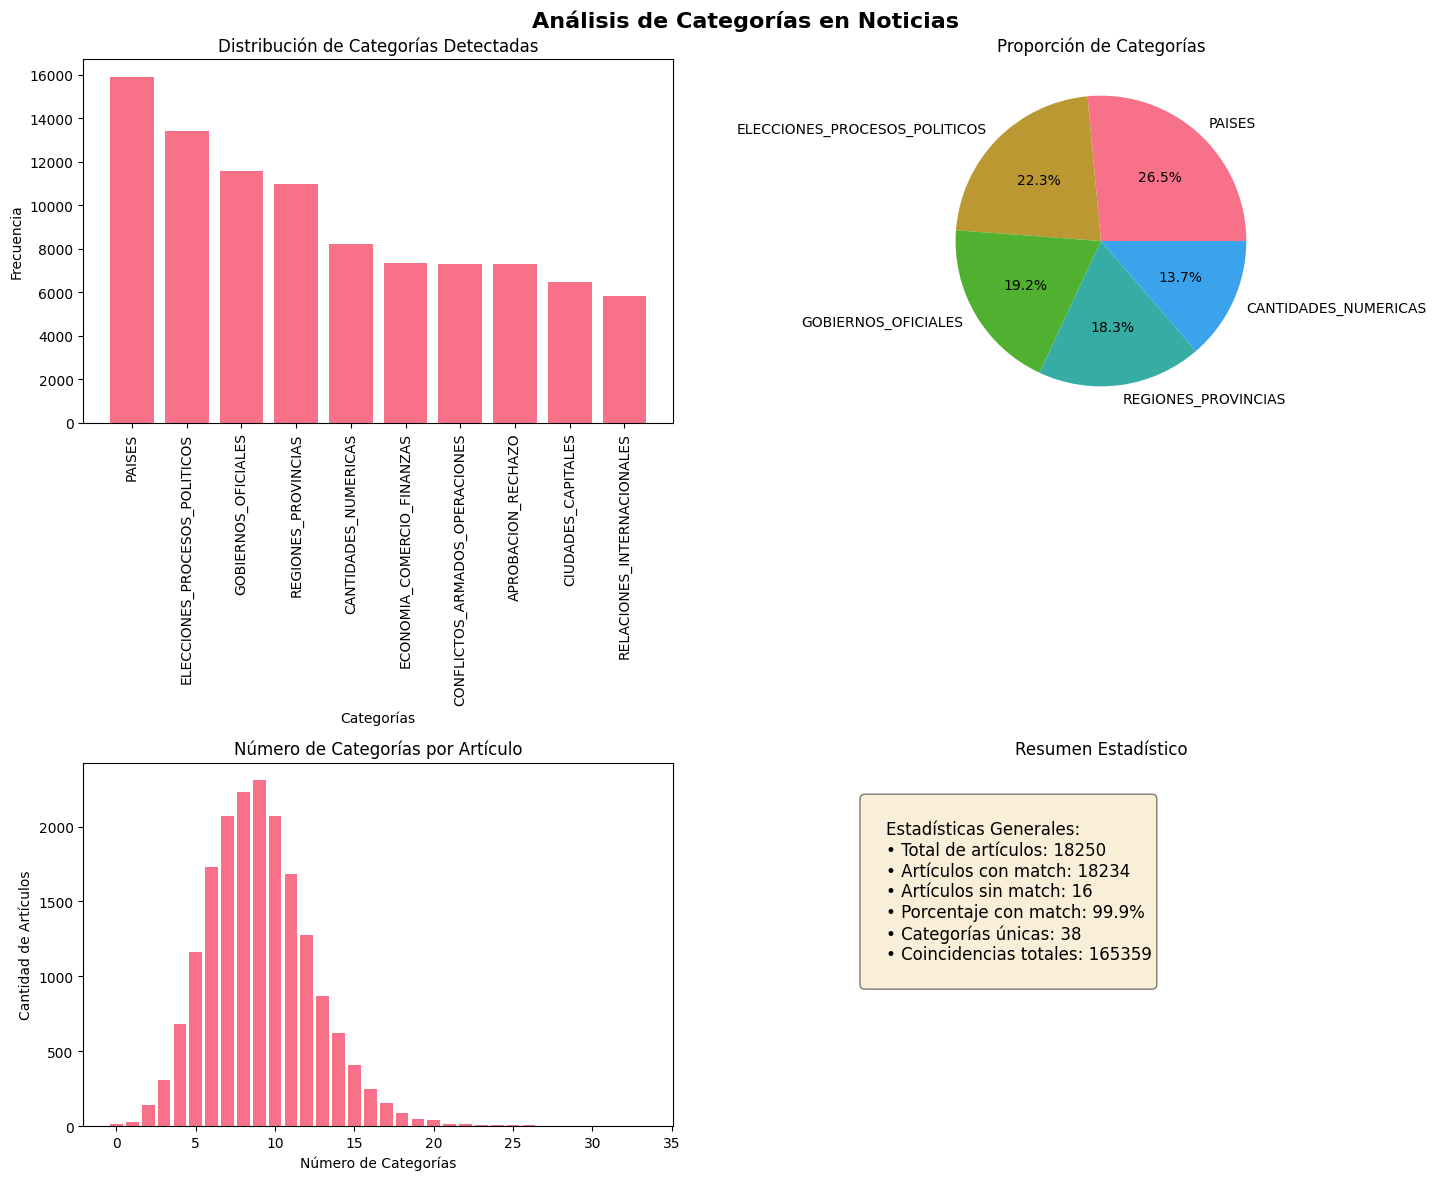

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

def generar_graficos_resultados(resultados, articulos_sin_match):
    """
    Genera gráficos de análisis de los resultados del procesamiento de noticias
    """
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Crear figura con subgráficos
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análisis de Categorías en Noticias', fontsize=16, fontweight='bold')
    
    # 1. Distribución de categorías
    todas_categorias = []
    for resultado in resultados:
        todas_categorias.extend(resultado['categorias'])
    
    contador_categorias = Counter(todas_categorias)
    
    if contador_categorias:
        categorias_df = pd.DataFrame.from_dict(contador_categorias, orient='index').reset_index()
        categorias_df.columns = ['Categoria', 'Frecuencia']
        categorias_df = categorias_df.sort_values('Frecuencia', ascending=False)
        
        # Gráfico de barras - categorías más frecuentes
        axes[0, 0].bar(categorias_df['Categoria'].head(10), categorias_df['Frecuencia'].head(10))
        axes[0, 0].set_title('Distribución de Categorías Detectadas')
        axes[0, 0].set_xlabel('Categorías')
        axes[0, 0].set_ylabel('Frecuencia')
        axes[0, 0].tick_params(axis='x', rotation=90)
        
        # Gráfico de pie - proporción de categorías
        axes[0, 1].pie(categorias_df['Frecuencia'].head(5), labels=categorias_df['Categoria'].head(5), autopct='%1.1f%%')
        axes[0, 1].set_title('Proporción de Categorías')
    
    # 2. Artículos por número de categorías detectadas
    num_categorias_por_articulo = [len(resultado['categorias']) for resultado in resultados]
    contador_num_categorias = Counter(num_categorias_por_articulo)
    
    axes[1, 0].bar(contador_num_categorias.keys(), contador_num_categorias.values())
    axes[1, 0].set_title('Número de Categorías por Artículo')
    axes[1, 0].set_xlabel('Número de Categorías')
    axes[1, 0].set_ylabel('Cantidad de Artículos')
    
    # 3. Estadísticas generales
    total_articulos = len(resultados)
    articulos_con_match = total_articulos - len(articulos_sin_match)
    porcentaje_con_match = (articulos_con_match / total_articulos) * 100 if total_articulos > 0 else 0
    
    stats_text = f"""
    Estadísticas Generales:
    • Total de artículos: {total_articulos}
    • Artículos con match: {articulos_con_match}
    • Artículos sin match: {len(articulos_sin_match)}
    • Porcentaje con match: {porcentaje_con_match:.1f}%
    • Categorías únicas: {len(contador_categorias)}
    • Coincidencias totales: {sum(contador_categorias.values())}
    """
    
    axes[1, 1].text(0.1, 0.9, stats_text, fontsize=12, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[1, 1].set_title('Resumen Estadístico')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    

generar_graficos_resultados(resultados, articulos_sin_match)

# Revisar resultados de match


In [55]:
import random


articulos_aleatorios = random.sample(resultados, 30)

for i in articulos_aleatorios:
    print("==" * 50)
    for j in i['detalles']:
        print(f"{j['texto_coincidencia']}: {j['categoria']}")
    print()
    print(i['text'])  
    print()
    print("==" * 50)
    print()

manifestó: PROTESTAS_CONFLICTOS_SOCIALES
denunció presiones para que su delegación no viajara a: CONFLICTOS_ARMADOS_OPERACIONES
capital: ECONOMIA_COMERCIO_FINANZAS
relaciones bilaterales: RELACIONES_INTERNACIONALES
expresó: ELECCIONES_PROCESOS_POLITICOS
anunció: ELECCIONES_PROCESOS_POLITICOS
presidente de francia: GOBIERNOS_OFICIALES
estudiantes: GRUPOS_ESPECIFICOS
apoyó: APROBACION_RECHAZO
destacó: APROBACION_RECHAZO
denunció: ACCIONES_LEGALES
acordó: NEGOCIACION_ACUERDOS
rusia: PAISES
moscú: CIUDADES_CAPITALES
estado ruso: REGIONES_PROVINCIAS
750 estudiantes: CANTIDADES_NUMERICAS
alrededor de 750: CANTIDADES_NUMERICAS


durante la reunión, que tuvo lugar en el kremlin, putin le expresó a su homólogo congolés que su participación en los actos del 9 de mayo confirma la genuina amistad de las relaciones bilaterales, basadas en el derecho y el respeto mutuo.
recordó que durante 2024 se conmemoró el aniversario 60 del establecimiento de relaciones diplomáticas entre ambas naciones. celebr

In [56]:
articulos_sin_match

[{'id': 256,
  'titulo': 'Despedida del santo padre: Fieles dan su último adiós - teleSUR',
  'text': 'durante toda la jornada de este miércoles miles de fieles han llegado hasta la basílica de san pedro, en el vaticano para despedir al papa francisco.\nsegún la oficina de prensa del vaticano, la basílica recibirá fieles hasta las 24h00 (hora local) de este miércoles y continuará desde las 07h00 (hora local) y hasta la medianoche del jueves.\n\n\n\nasimismo, hasta la santa sede también han llegado cardenales de distantos países del mundo para también dar el último adiós a francisco: fotos: efe.'},
 {'id': 1529,
  'titulo': 'Lo mejor de teleSUR 16-12 Tarde - teleSUR',
  'text': '\n\n\n'},
 {'id': 1554,
  'titulo': 'Lo mejor de teleSUR 02-05-2025 Tarde - teleSUR',
  'text': '\n'},
 {'id': 1949,
  'titulo': 'Lo mejor de teleSUR 27-02-2025 (Mañana) - teleSUR',
  'text': '\n'},
 {'id': 6642,
  'titulo': 'China desarrolla dispositivo con IA para ayudar a personas ciegas a desplazarse - teleS